In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print('Modules are imported.')

Modules are imported.


# READING THE DATASET FILE(.CSV) 

In [ ]:
corona_dataset_csv = pd.read_csv('time_series_covid19_confirmed_global.csv')
corona_dataset_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,853,853,853,853,854,854,855,855,855,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,130,138,140,142,148,155,166,172,176,183


In [ ]:
corona_dataset_csv.shape

(266, 156)

# DELETING  UNNECESSARY COLOUMNS

In [ ]:
corona_dataset_csv.drop(['Lat','Long'],axis=1,inplace=True)

In [ ]:
corona_dataset_csv.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833
1,NaN,Albania,0,0,0,0,0,0,0,0,...,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,853,853,853,853,854,854,855,855,855,855
4,NaN,Angola,0,0,0,0,0,0,0,0,...,130,138,140,142,148,155,166,172,176,183


# Aggregating by the country name

In [ ]:
corona_dataset_aggregated=corona_dataset_csv.groupby('Country/Region').sum()

In [ ]:
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833
Albania,0,0,0,0,0,0,0,0,0,0,...,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962
Algeria,0,0,0,0,0,0,0,0,0,0,...,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771
Andorra,0,0,0,0,0,0,0,0,0,0,...,853,853,853,853,854,854,855,855,855,855
Angola,0,0,0,0,0,0,0,0,0,0,...,130,138,140,142,148,155,166,172,176,183


In [ ]:
corona_dataset_aggregated.shape

(188, 152)

# visualising the the data of confirmed cases till 6/10/20 (mm/dd/yyy)

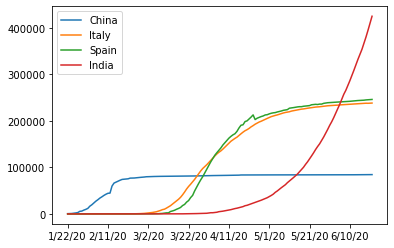

In [ ]:
corona_dataset_aggregated.loc['China'].plot()
corona_dataset_aggregated.loc['Italy'].plot()
corona_dataset_aggregated.loc['Spain'].plot()
corona_dataset_aggregated.loc['India'].plot()
plt.legend()

# visualizing data according to dates 

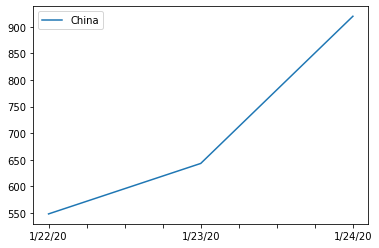

In [ ]:
#corona_dataset_aggregated.loc['India'][:3].plot()
corona_dataset_aggregated.loc['China'][:3].plot()
plt.legend()

# To check new confirmed cases we need to find the first derivative by using diff() func

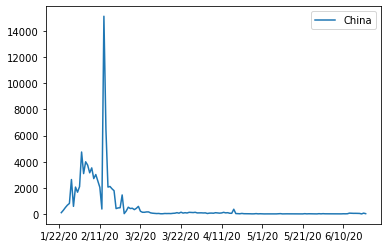

In [ ]:
corona_dataset_aggregated.loc['China'].diff().plot()
plt.legend()

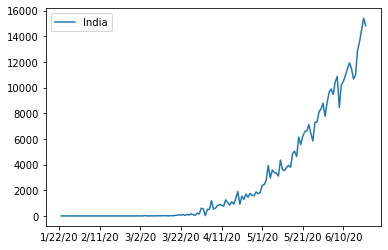

In [ ]:
corona_dataset_aggregated.loc['India'].diff().plot()
plt.legend()

In [ ]:
#maximum infection rate in china in one day
corona_dataset_aggregated.loc['China'].diff().max()

15136.0

In [ ]:
#maximum infection rate in India in one day
corona_dataset_aggregated.loc['India'].diff().max()

15403.0

# Finding the max infection rate for all countries and putting in dataset

In [ ]:
countries = list(corona_dataset_aggregated.index)
max_rate = []
for i in countries:
    max_rate.append(corona_dataset_aggregated.loc[i].diff().max())
corona_dataset_aggregated['max_infect_rate'] = max_rate
corona_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,max_infect_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,24102,24766,25527,26310,26874,27532,27878,28424,28833,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,1464,1521,1590,1672,1722,1788,1838,1891,1962,82.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,10810,10919,11031,11147,11268,11385,11504,11631,11771,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,853,853,853,854,854,855,855,855,855,79.0
Angola,0,0,0,0,0,0,0,0,0,0,...,138,140,142,148,155,166,172,176,183,17.0


In [ ]:
corona_data=pd.DataFrame(corona_dataset_aggregated['max_infect_rate'])

In [ ]:
corona_data.head()

,max_infect_rate
Country/Region,
Afghanistan,915.0
Albania,82.0
Algeria,199.0
Andorra,79.0
Angola,17.0


# getting the shape of this dataset using .shape

In [ ]:
corona_data.shape

(188, 1)

# Import Worldwide Happiness Report Dataset

In [ ]:
corona_happiness_report_csv=pd.read_csv("worldwide_happiness_report.csv")
corona_happiness_report_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
corona_happiness_report_csv.shape

(156, 9)

# deleting uselesscols

In [ ]:
useless_cols=["Overall rank","Score","Generosity","Perceptions of corruption"]

In [ ]:
corona_happiness_report_csv.drop(useless_cols,axis=1,inplace=True)

In [ ]:
corona_happiness_report_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


# corona_happiness_report_csv.set_index("Country or region",inplace = True)

In [ ]:
#setting index to country so that we can find our result more relevant
corona_happiness_report_csv.set_index(['Country or region'],inplace=True)

In [ ]:
corona_happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [ ]:
corona_happiness_report_csv.shape

(156, 4)

# before joining check the shape of corona_data and corona_happiness_report

In [ ]:
corona_data.shape

(188, 1)

In [ ]:
corona_happiness_report_csv.shape

(156, 4)

# performing inner join

In [ ]:
data=corona_data.join(corona_happiness_report_csv,how="inner")
#data=corona_data.join(corona_happiness_report_csv).copy()
#data = world_happiness_report.join(corona_data).copy()

In [ ]:
data.head()

,max_infect_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,915.0,0.350,0.517,0.361,0.000
Albania,82.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,2060.0,1.092,1.432,0.881,0.471
Armenia,766.0,0.850,1.055,0.815,0.283


In [ ]:
data.shape

(144, 5)

# we need to make a correlation of the matrix by using .corr()

In [ ]:
data.corr()

,max_infect_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infect_rate,1.000000,0.163941,0.129090,0.170824,0.043543
GDP per capita,0.163941,1.000000,0.757521,0.859431,0.394799
Social support,0.129090,0.757521,1.000000,0.751632,0.456317
Healthy life expectancy,0.170824,0.859431,0.751632,1.000000,0.423146
Freedom to make life choices,0.043543,0.394799,0.456317,0.423146,1.000000


# VISUALIZING THE DATA

GDP VS MAX_INFECT_RATE

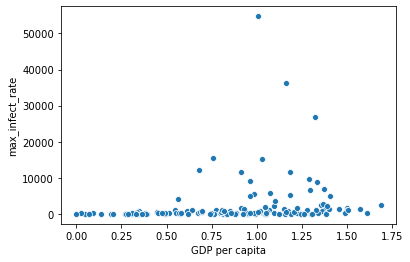

In [ ]:
x=data["GDP per capita"]
y=data["max_infect_rate"]
sns.scatterplot(x,y)

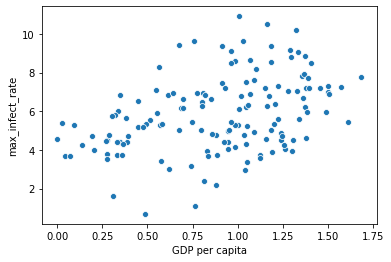

In [ ]:
x = data["GDP per capita"]
y = data["max_infect_rate"]
sns.scatterplot(x,np.log(y)) #apply logscaling to y

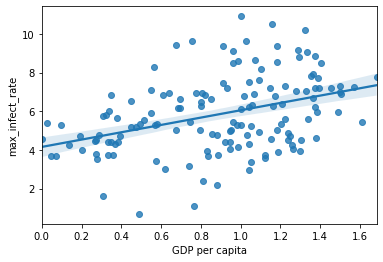

In [ ]:
x = data["GDP per capita"]
y = data["max_infect_rate"]
sns.regplot(x,np.log(y)) #apply logscaling to y

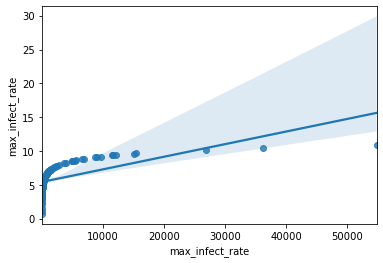

In [ ]:

x = data["max_infect_rate"]
y = data["max_infect_rate"]
sns.regplot(x,np.log(y)) #apply logscaling to y

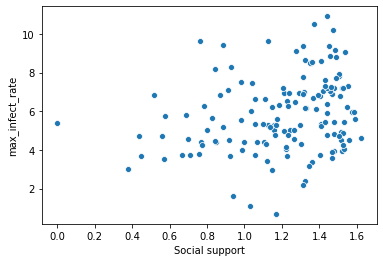

In [ ]:
x=data["Social support"]
y=data["max_infect_rate"]
sns.scatterplot(x,np.log(y))

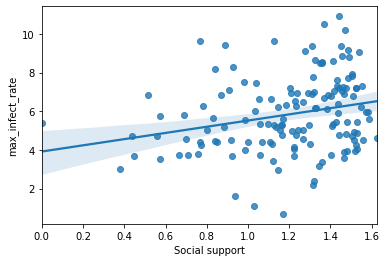

In [ ]:
x=data["Social support"]
y=data["max_infect_rate"]
sns.regplot(x,np.log(y))

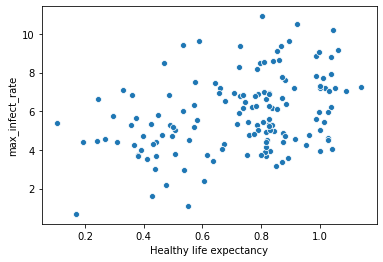

In [ ]:
x=data["Healthy life expectancy"]
y=data["max_infect_rate"]
sns.scatterplot(x,np.log(y))

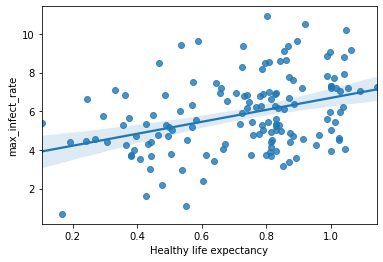

In [ ]:
x=data["Healthy life expectancy"]
y=data["max_infect_rate"]
sns.regplot(x,np.log(y))

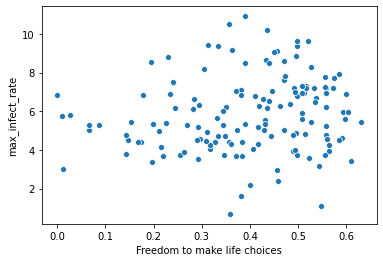

In [ ]:
x=data["Freedom to make life choices"]
y=data["max_infect_rate"]
sns.scatterplot(x,np.log(y))

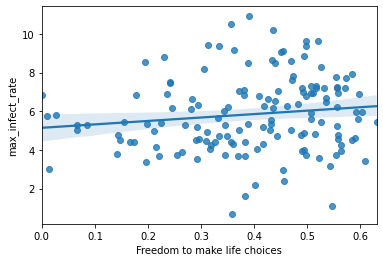

In [ ]:
x=data["Freedom to make life choices"]
y=data["max_infect_rate"]
sns.regplot(x,np.log(y))